In [6]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data_filepath = "input/data/coronaviridae/coronaviridae_seq_parsed.csv"
metadata_filepath = "input/data/coronaviridae/uniprot-coronoviridae-s-2023.05.03.tsv"

In [36]:
data_df = pd.read_csv(os.path.join(os.getcwd(), "..", "..", data_filepath))
metadata_df = pd.read_table(os.path.join(os.getcwd(), "..", "..", metadata_filepath))

In [37]:
print(data_df.shape)
data_df.head()

(8692, 2)


,uniprot_id,seq
0,A0A2R4KP93,MRLSVCLLMFLLTPIKGDVDSGPPSSATSCKEADMRNSSSEFFNKQ...
1,A0A6B9WHD3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSSTRGVYYPDKVFRSS...
2,A0A6G6A1M4,MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...
3,A0A6M3G9R1,MLFFFFLHFALVNSQCVNLTGRAAIQPSFTNSSQRGVYYPDTIFRS...
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...


In [38]:
print(metadata_df.shape)
metadata_df.head()

(8692, 7)


,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Virus hosts
0,A0A2R4KP93,A0A2R4KP93_MERS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Middle East respiratory syndrome-related coron...,1349,NaN
1,A0A6B9WHD3,A0A6B9WHD3_SARS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Bat coronavirus RaTG13,1269,NaN
2,A0A6G6A1M4,A0A6G6A1M4_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1267,NaN
3,A0A6M3G9R1,A0A6M3G9R1_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1265,NaN
4,A3EX94,SPIKE_BCHK4,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S 2,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...


In [39]:
df = data_df.set_index("uniprot_id").join(metadata_df.set_index("Entry"))

In [40]:
df.shape

(8692, 7)

In [41]:
df.reset_index(inplace=True)
df.head()

,uniprot_id,seq,Entry Name,Protein names,Gene Names,Organism,Length,Virus hosts
0,A0A2R4KP93,MRLSVCLLMFLLTPIKGDVDSGPPSSATSCKEADMRNSSSEFFNKQ...,A0A2R4KP93_MERS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Middle East respiratory syndrome-related coron...,1349,NaN
1,A0A6B9WHD3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSSTRGVYYPDKVFRSS...,A0A6B9WHD3_SARS,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Bat coronavirus RaTG13,1269,NaN
2,A0A6G6A1M4,MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...,A0A6G6A1M4_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1267,NaN
3,A0A6M3G9R1,MLFFFFLHFALVNSQCVNLTGRAAIQPSFTNSSQRGVYYPDTIFRS...,A0A6M3G9R1_9BETC,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S,Pangolin coronavirus,1265,NaN
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,SPIKE_BCHK4,Spike glycoprotein (S glycoprotein) (E2) (Pepl...,S 2,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...


In [42]:
df = df[["uniprot_id", "seq", "Organism", "Length", "Virus hosts"]]
df.rename(columns={"uniprot_id": "id", "Organism": "virus", "Length": "seq_len", "Virus hosts": "virus_host"}, inplace=True)
print(df.shape)

(8692, 5)


In [43]:
df.head()

,id,seq,virus,seq_len,virus_host
0,A0A2R4KP93,MRLSVCLLMFLLTPIKGDVDSGPPSSATSCKEADMRNSSSEFFNKQ...,Middle East respiratory syndrome-related coron...,1349,NaN
1,A0A6B9WHD3,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSSTRGVYYPDKVFRSS...,Bat coronavirus RaTG13,1269,NaN
2,A0A6G6A1M4,MFVFLFVLPLVSSQCVNLTTRTGIPPGYTNSSTRGVYYPDKVFRSS...,Pangolin coronavirus,1267,NaN
3,A0A6M3G9R1,MLFFFFLHFALVNSQCVNLTGRAAIQPSFTNSSQRGVYYPDTIFRS...,Pangolin coronavirus,1265,NaN
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...


In [44]:
def column_stats(df, column_name):
    print(f"df shape = {df.shape}")
    print(f"{column_name} stats")
    print(f"number of unique values = {df[column_name].nunique()}")
    print(df[column_name].value_counts())

In [45]:
column_stats(df, "virus")

df shape = (8692, 5)
virus stats
number of unique values = 465
Porcine epidemic diarrhea virus                                             2611
Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2)    1311
Infectious bronchitis virus                                                  800
Human coronavirus OC43 (HCoV-OC43)                                           613
Feline coronavirus                                                           486
                                                                            ... 
Feline coronavirus (strain FIPV WSU-79/1146) (FCoV)                            1
Porcine transmissible gastroenteritis coronavirus (strain Purdue) (TGEV)       1
Avian infectious bronchitis virus (strain 6/82) (IBV)                          1
Human betacoronavirus 2c England-Qatar/2012                                    1
Bat SARS-like coronavirus Rs4087-1                                             1
Name: virus, Length: 465, dtype: int64


In [46]:
column_stats(df, "virus_host")

df shape = (8692, 5)
virus_host stats
number of unique values = 20
Homo sapiens (Human) [TaxID: 9606]                                                                                                                                                                                                            2400
Meleagris gallopavo (Wild turkey) [TaxID: 9103]                                                                                                                                                                                                 36
Homo sapiens (Human) [TaxID: 9606]; Paguma larvata (Masked palm civet) [TaxID: 9675]                                                                                                                                                            20
Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]                                                                                                                

In [47]:
n_virus_host_nan = df["virus_host"].isna().sum()
print(f"n_virus_host_nan= {n_virus_host_nan}")

n_virus_host_nan= 6146


In [48]:
virus_host_nan_df = df[df["virus_host"].isna()]

In [49]:
virus_host_nan_df.shape

(6146, 5)

In [50]:
column_stats(virus_host_nan_df, "virus")

df shape = (6146, 5)
virus stats
number of unique values = 403
Porcine epidemic diarrhea virus                                    2611
Infectious bronchitis virus                                         800
Feline coronavirus                                                  486
Canine coronavirus                                                  455
Middle East respiratory syndrome-related coronavirus (MERS-CoV)     349
                                                                   ... 
Bat SARS coronavirus HKU3-2                                           1
Bat SARS coronavirus HKU3-3                                           1
SARS coronavirus ZJ02                                                 1
SARS coronavirus Frankfurt 1                                          1
Bat SARS-like coronavirus Rs4087-1                                    1
Name: virus, Length: 403, dtype: int64


In [51]:
# Setting virus host for Porcine epidemic diarrhea virus
df.loc[df["virus"] == "Porcine epidemic diarrhea virus", "virus_host"] = "Sus scrofa (Pig) [TaxID: 9823]"

In [52]:
virus_host_nan_df = df[df["virus_host"].isna()]
virus_host_nan_df.shape

(3535, 5)

In [53]:
df = df[df["virus_host"].notna()]
df.shape

(5157, 5)

In [55]:
column_stats(df, "virus")

df shape = (5157, 5)
virus stats
number of unique values = 63
Porcine epidemic diarrhea virus                                                 2611
Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2)        1311
Human coronavirus OC43 (HCoV-OC43)                                               613
Human coronavirus NL63 (HCoV-NL63)                                               229
Human coronavirus HKU1 (HCoV-HKU1)                                               126
                                                                                ... 
Porcine hemagglutinating encephalomyelitis virus (strain IAF-404) (HEV)            1
Bovine coronavirus (strain 98TXSF-110-LUN) (BCoV-LUN) (BCV)                        1
Rat coronavirus (strain 681) (RCV-SDAV) (Sialodacryoadenitis virus SDAV-681)       1
Bovine coronavirus (strain OK-0514) (BCoV) (BCV)                                   1
Avian infectious bronchitis virus (strain H120) (IBV)                              1
Nam

In [56]:
column_stats(df, "virus_host")

df shape = (5157, 5)
virus_host stats
number of unique values = 20
Sus scrofa (Pig) [TaxID: 9823]                                                                                                                                                                                                                2620
Homo sapiens (Human) [TaxID: 9606]                                                                                                                                                                                                            2400
Meleagris gallopavo (Wild turkey) [TaxID: 9103]                                                                                                                                                                                                 36
Homo sapiens (Human) [TaxID: 9606]; Paguma larvata (Masked palm civet) [TaxID: 9675]                                                                                                                        

In [57]:
df.head()

,id,seq,virus,seq_len,virus_host
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...
5,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...
6,A3EXG6,MLLILVLGVSLAAASRPECFNPRFTLTPLNHTLNYTSIKAKVSNVL...,Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9),1274,Rousettus leschenaultii (Leschenault's rousett...
8,K9N5Q8,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,Middle East respiratory syndrome-related coron...,1353,Camelus dromedarius (Dromedary) (Arabian camel...
9,P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Severe acute respiratory syndrome coronavirus ...,1273,Homo sapiens (Human) [TaxID: 9606]


In [59]:
# split the virus_host name by ';' for multiple hosts
df["virus_host"] = df["virus_host"].transform(lambda x: x.split(";"))

In [60]:
df_exploded = df.explode("virus_host")
df_exploded["virus_host"] = df_exploded["virus_host"].transform(lambda x: x.strip())

In [63]:
df_exploded.shape
df_exploded.head()

,id,seq,virus,seq_len,virus_host
4,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...
5,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...
6,A3EXG6,MLLILVLGVSLAAASRPECFNPRFTLTPLNHTLNYTSIKAKVSNVL...,Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9),1274,Rousettus leschenaultii (Leschenault's rousett...
8,K9N5Q8,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,Middle East respiratory syndrome-related coron...,1353,Camelus dromedarius (Dromedary) (Arabian camel...
8,K9N5Q8,MIHSVFLLMFLLTPTESYVDVGPDSVKSACIEVDIQQTFFDKTWPR...,Middle East respiratory syndrome-related coron...,1353,Homo sapiens (Human) [TaxID: 9606]


In [64]:
column_stats(df_exploded, "virus")

df shape = (5182, 5)
virus stats
number of unique values = 63
Porcine epidemic diarrhea virus                                                 2611
Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2)        1311
Human coronavirus OC43 (HCoV-OC43)                                               613
Human coronavirus NL63 (HCoV-NL63)                                               229
Human coronavirus HKU1 (HCoV-HKU1)                                               126
                                                                                ... 
Bovine coronavirus (strain 98TXSF-110-LUN) (BCoV-LUN) (BCV)                        1
Rat coronavirus (strain 681) (RCV-SDAV) (Sialodacryoadenitis virus SDAV-681)       1
Bovine coronavirus (strain OK-0514) (BCoV) (BCV)                                   1
Bovine coronavirus (strain LSU-94LSS-051) (BCoV-LSU) (BCV)                         1
Avian infectious bronchitis virus (strain H120) (IBV)                              1
Nam

In [65]:
column_stats(df_exploded, "virus_host")

df shape = (5182, 5)
virus_host stats
number of unique values = 22
Sus scrofa (Pig) [TaxID: 9823]                                                                  2620
Homo sapiens (Human) [TaxID: 9606]                                                              2421
Meleagris gallopavo (Wild turkey) [TaxID: 9103]                                                   36
Paguma larvata (Masked palm civet) [TaxID: 9675]                                                  20
Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]      19
Tylonycteris pachypus (Lesser bamboo bat) (Vespertilio pachypus) [TaxID: 258959]                  17
Gallus gallus (Chicken) [TaxID: 9031]                                                             13
Bos taurus (Bovine) [TaxID: 9913]                                                                 10
Mus musculus (Mouse) [TaxID: 10090]                                                                6
Rhinolophus sinicus (Chi

In [66]:
df_exploded = df_exploded.set_index("id")
print(f"Dataset size before removing duplicates: {df_exploded.shape}")
print(f"Number of duplicate records = {df_exploded.index.duplicated(keep=False).sum()}")
df_dedup = df_exploded[~df_exploded.index.duplicated(keep=False)]
print(f"Dataset size after removing duplicates: {df_dedup.shape}")

Dataset size before removing duplicates: (5182, 4)
Number of duplicate records = 48
Dataset size after removing duplicates: (5134, 4)


In [67]:
column_stats(df_dedup, "virus_host")

df shape = (5134, 4)
virus_host stats
number of unique values = 16
Sus scrofa (Pig) [TaxID: 9823]                                                                  2620
Homo sapiens (Human) [TaxID: 9606]                                                              2400
Meleagris gallopavo (Wild turkey) [TaxID: 9103]                                                   36
Pipistrellus abramus (Japanese pipistrelle) (Pipistrellus javanicus abramus) [TaxID: 105295]      19
Tylonycteris pachypus (Lesser bamboo bat) (Vespertilio pachypus) [TaxID: 258959]                  17
Gallus gallus (Chicken) [TaxID: 9031]                                                             13
Bos taurus (Bovine) [TaxID: 9913]                                                                 10
Mus musculus (Mouse) [TaxID: 10090]                                                                6
Rhinolophus sinicus (Chinese rufous horseshoe bat) [TaxID: 89399]                                  3
Canis lupus familiaris (

In [69]:
column_stats(df_dedup, "virus")

df shape = (5134, 4)
virus stats
number of unique values = 59
Porcine epidemic diarrhea virus                                                        2611
Severe acute respiratory syndrome coronavirus 2 (2019-nCoV) (SARS-CoV-2)               1311
Human coronavirus OC43 (HCoV-OC43)                                                      613
Human coronavirus NL63 (HCoV-NL63)                                                      229
Human coronavirus HKU1 (HCoV-HKU1)                                                      126
Human coronavirus 229E (HCoV-229E)                                                      118
Turkey enteric coronavirus (TCoV) (TCV)                                                  36
Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004)                                           19
Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004)                                           16
Bat coronavirus HKU3 (BtCoV) (SARS-like coronavirus HKU3)                                 3
Avian infectious b

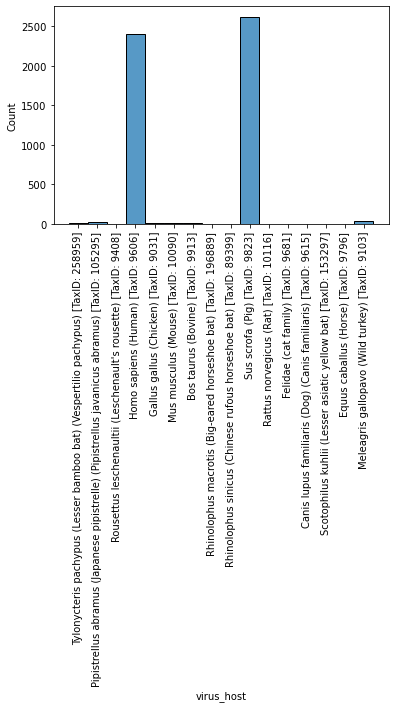

In [68]:
ax = sns.histplot(data=df_dedup, x="virus_host")
plt.xticks(rotation=90)
plt.show()

In [29]:
# create host binary label: 'human' and 'not human'
df_dedup["binary_label"] = df_dedup["virus_host"].apply(lambda x: "Human" if x == "Homo sapiens (Human) [TaxID: 9606]" else "Not Human")

C:\Users\bless\AppData\Local\Temp/ipykernel_11020/2983036214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedup["binary_label"] = df_dedup["virus_host"].apply(lambda x: "Human" if x == "Homo sapiens (Human) [TaxID: 9606]" else "Not Human")


In [30]:
df_dedup["binary_label"].value_counts()

Not Human    2734
Human        2400
Name: binary_label, dtype: int64

In [31]:
df_dedup.reset_index(inplace=True)
df_dedup.head()

,id,seq,virus,seq_len,virus_host,binary_label
0,A3EX94,MTLLMCLLMSLLIFVRGCDSQFVDMSPASNTSECLESQVDAAAFSK...,Bat coronavirus HKU4 (BtCoV) (BtCoV/HKU4/2004),1352,Tylonycteris pachypus (Lesser bamboo bat) (Ves...,Not Human
1,A3EXD0,MIRSVLVLMCSLTFIGNLTRGQSVDMGHNGTGSCLDSQVQPDYFES...,Bat coronavirus HKU5 (BtCoV) (BtCoV/HKU5/2004),1352,Pipistrellus abramus (Japanese pipistrelle) (P...,Not Human
2,A3EXG6,MLLILVLGVSLAAASRPECFNPRFTLTPLNHTLNYTSIKAKVSNVL...,Bat coronavirus HKU9 (BtCoV) (BtCoV/HKU9),1274,Rousettus leschenaultii (Leschenault's rousett...,Not Human
3,P0DTC2,MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSS...,Severe acute respiratory syndrome coronavirus ...,1273,Homo sapiens (Human) [TaxID: 9606],Human
4,P11223,MLVTPLLLVTLLCALCSAVLYDSSSYVYYYQSAFRPPSGWHLQGGA...,Avian infectious bronchitis virus (strain Beau...,1162,Gallus gallus (Chicken) [TaxID: 9031],Not Human


In [36]:
df_dedup.to_csv(os.path.join(os.getcwd(), "..", "..", "input/data/coronaviridae", "coronavirade_final.csv"), index=False)